In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(taxi_tickets.shape)
print(taxi_tickets.dtypes)
taxi_tickets.head()

(261936, 16)
Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


In [4]:
rb_taxi_tickets = taxi_tickets[taxi_tickets['Violation Code'].isin(['0964170A','0964170B'])]
print(rb_taxi_tickets.shape)
print(rb_taxi_tickets.dtypes)
rb_taxi_tickets.head()

(51740, 16)
Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
15,55984582,3529TX,IL,TXI,MERZ,01/18/2009 10:04 pm,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40
16,55571353,5493TX,IL,TXI,CHEV,01/09/2009 06:35 am,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40
22,55772826,1262TX,IL,TXI,FORD,01/19/2009 07:30 am,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49


## Ticket Costs

Both residential and business street parking tickets for taxis were \$25.00 until April of 2014 when a new budget in Chicago took effect and increased the price of residential street parking tickets for taxis and other named vehicles to \$75.00.

Taking that change into account, the data can be adjusted with a ticket cost depending on time.

In [5]:
rb_taxi_tickets['Ticket Cost'] = 25.00
print(rb_taxi_tickets.dtypes)
rb_taxi_tickets.head()

Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
Ticket Cost              float64
dtype: object


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Ticket Cost
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39,25.0
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,25.0
15,55984582,3529TX,IL,TXI,MERZ,01/18/2009 10:04 pm,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40,25.0
16,55571353,5493TX,IL,TXI,CHEV,01/09/2009 06:35 am,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40,25.0
22,55772826,1262TX,IL,TXI,FORD,01/19/2009 07:30 am,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49,25.0


In [7]:
rb_taxi_tickets['Issue Date'] = pd.to_datetime(rb_taxi_tickets['Issue Date'])
rb_taxi_tickets = rb_taxi_tickets.set_index(pd.DatetimeIndex(rb_taxi_tickets['Issue Date']))
print(rb_taxi_tickets.dtypes)
rb_taxi_tickets.head()

Ticket Number                     int64
License Plate Number             object
License Plate State              object
License Plate Type               object
Ticket Make                      object
Issue Date               datetime64[ns]
Violation Location               object
Violation Code                   object
Violation Description            object
Badge                            object
Unit                             object
Ticket Queue                     object
Hearing Dispo                    object
Latitude                        float64
Longitude                       float64
Ward                              int64
Ticket Cost                     float64
dtype: object


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Ticket Cost
2009-01-06 06:53:00,54574383,5141TX,IL,TXI,MERC,2009-01-06 06:53:00,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39,25.0
2009-01-05 04:19:00,55388795,25495TX,IL,TXI,MERC,2009-01-05 04:19:00,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,25.0
2009-01-18 22:04:00,55984582,3529TX,IL,TXI,MERZ,2009-01-18 22:04:00,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40,25.0
2009-01-09 06:35:00,55571353,5493TX,IL,TXI,CHEV,2009-01-09 06:35:00,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40,25.0
2009-01-19 07:30:00,55772826,1262TX,IL,TXI,FORD,2009-01-19 07:30:00,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49,25.0


In [12]:
rb_taxi_tickets['Ticket Cost'].unique()

array([ 25.])

In [17]:
# For all residential taxi tickets given after 04/01/2014, set the Ticket Cost to $75.00
rb_taxi_tickets.loc[(rb_taxi_tickets['Issue Date'] >= '2014-04-01') & (rb_taxi_tickets['Violation Code'] == '0964170A'),'Ticket Cost'] = 75.00
rb_taxi_tickets['Ticket Cost'].unique()

array([ 25.,  75.])

In [19]:
# Start and end date for tickets in this dataset
print(rb_taxi_tickets['Issue Date'].max())
print(rb_taxi_tickets['Issue Date'].min())

2016-03-10 10:36:00
2009-01-01 06:07:00


In [20]:
# Some tickets were unpaid, looking at all statuses in Ticket Queue
rb_taxi_tickets['Ticket Queue'].unique()

array(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court',
       'Hearing Req'], dtype=object)

In [21]:
rb_taxi_tickets.to_csv('taxi_ticket_data/residential_business_parking/taxi_tickets_res_bus_cost.csv', index=False)

## Taxi Ticket Status - Residential and Business 

### Breaking down by paid, dismissed, etc.

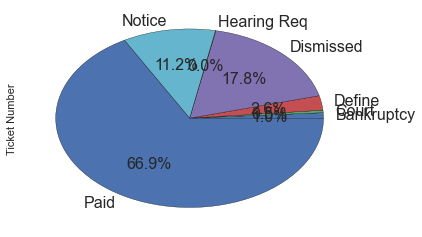

In [22]:
rb_taxi_ticket_status = rb_taxi_tickets.groupby(['Ticket Queue'])['Ticket Number'].count()
rb_taxi_ticket_status.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

## Total Cost of Residential and Business Tickets

Breaking down tickets by category, then getting the total revenue from tickets paid from taxi drivers for residential and business street parking

In [23]:
print(rb_taxi_tickets.shape)
rb_paid_taxi_tickets = rb_taxi_tickets[rb_taxi_tickets['Ticket Queue'] == 'Paid']
print(rb_paid_taxi_tickets.shape)

(51740, 17)
(34613, 17)


In [25]:
res_ticket_count = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170A']['Ticket Number'].count()
res_ticket_amount = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170A']['Ticket Cost'].sum()

bus_ticket_count = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170B']['Ticket Number'].count()
bus_ticket_amount = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170B']['Ticket Cost'].sum()

total_ticket_count = rb_paid_taxi_tickets['Ticket Number'].count()
total_ticket_amount = rb_paid_taxi_tickets['Ticket Cost'].sum()

print('Number of paid residential parking taxi tickets: {}'.format(res_ticket_count))
print('Total revenue from paid residential parking taxi tickets: ${:,.2f}'.format(res_ticket_amount))

print('\nNumber of paid business street parking taxi tickets: {}'.format(bus_ticket_count))
print('Total revenue from paid business street parking taxi tickets: ${:,.2f}'.format(bus_ticket_amount))

print('\nNumber of paid residential and business street parking taxi tickets: {}'.format(total_ticket_count))
print('Total amount from paid residential and business steet parking taxi tickets: ${:,.2f}'.format(total_ticket_amount))

Number of paid residential parking taxi tickets: 25797
Total revenue from paid residential parking taxi tickets: $804,575.00

Number of paid business street parking taxi tickets: 8816
Total revenue from paid business street parking taxi tickets: $220,400.00

Number of paid residential and business street parking taxi tickets: 34613
Total amount from paid residential and business steet parking taxi tickets: $1,024,975.00


## Ticket Revenue by Ward

### Residential Tickets
#### Notes
* 40th ward has most tickets for both categories. Worth looking into whether enforcement is higher here, or if a higher amount of drivers live in the ward.
    * Especially given that it's even more disproportionate in business street tickets

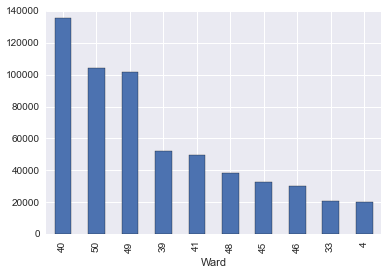

In [28]:
res_tickets_ward = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170A'].groupby(['Ward'])['Ticket Cost'].sum()
top_res_tickets_ward = res_tickets_ward.sort_values(ascending=False)
top_res_tickets_ward = top_res_tickets_ward[:10]
top_res_tickets_ward.plot(kind='bar')

### Business Street Tickets


#### Notes
* The 40th ward has far and away the most revenue for business street tickets on taxis. It has some exemptions, but would be worth considering adding more
    * Look at which streets in 40th ward have the highest amount of tickets, consider exemptions on those
* 46 and 49 are listed as being exempt from business street parking for taxis, look at when that was amended in the ordinance, see if the tickets occured after the exemption was in place

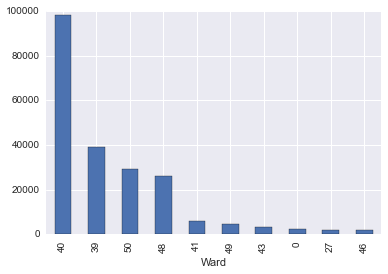

In [29]:
bus_tickets_ward = rb_paid_taxi_tickets[rb_paid_taxi_tickets['Violation Code'] == '0964170B'].groupby(['Ward'])['Ticket Cost'].sum()
top_bus_tickets_ward = bus_tickets_ward.sort_values(ascending=False)
top_bus_tickets_ward = top_bus_tickets_ward[:10]
top_bus_tickets_ward.plot(kind='bar')

### Both Ticket Categories
#### Notes 
* Tickets across wards smooth out dramatically when combined

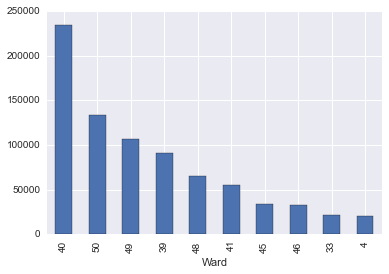

In [31]:
both_tickets_ward = rb_paid_taxi_tickets.groupby(['Ward'])['Ticket Cost'].sum()
top_both_tickets_ward = both_tickets_ward.sort_values(ascending=False)
top_both_tickets_ward = top_both_tickets_ward[:10]
top_both_tickets_ward.plot(kind='bar')

## Unpaid Tickets for Residential and Business Parking

### Looking at reasons, breakdown
#### Notes
* Many are left in "Notice" category, assuming they were just ignored

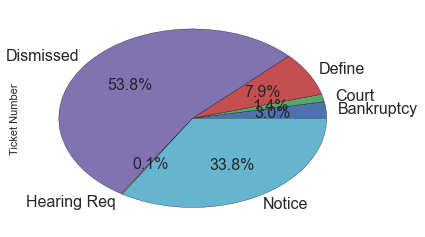

In [40]:
rb_unpaid_tickets = rb_taxi_tickets[rb_taxi_tickets['Ticket Queue'] != 'Paid']
rb_unpaid_status = rb_unpaid_tickets.groupby(['Ticket Queue'])['Ticket Number'].count()
rb_unpaid_status.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

In [44]:
print('Total number of tickets with status of "Notice": {}'.format(rb_unpaid_tickets.loc[(rb_unpaid_tickets['Ticket Queue'] == 'Notice'),'Ticket Cost'].count()))
count_notice_pre_16 = rb_unpaid_tickets.loc[(rb_unpaid_tickets['Year'] < 2016) & (rb_unpaid_tickets['Ticket Queue'] == 'Notice'),'Ticket Cost'].count()
print('Total number of tickets with status of "Notice" before 2016: {}'.format(count_notice_pre_16))

Total number of tickets with status of "Notice": 5792
Total number of tickets with status of "Notice" before 2016: 5425


## Tickets by License Plate


Mean tickets per plate number from 2009 to March 10, 2016: 5.96827411168


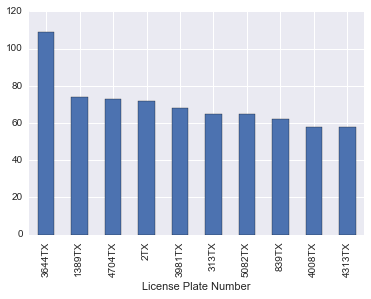

In [34]:
rb_taxi_tickets_plate = rb_taxi_tickets.groupby(['License Plate Number'])['Ticket Number'].count()
top_tickets_plate = rb_taxi_tickets_plate.sort_values(ascending=False)
top_tickets_plate = top_tickets_plate[:10]

mean_tickets_plate = rb_taxi_tickets_plate.mean()
print('Mean tickets per plate number from 2009 to March 10, 2016: {}'.format(mean_tickets_plate))
top_tickets_plate.plot(kind='bar')

### Tickets by Plate and Year

In [36]:
rb_taxi_tickets['Year'] = rb_taxi_tickets.index.year
rb_taxi_tickets.head()

,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Ticket Cost,Year
2009-01-06 06:53:00,54574383,5141TX,IL,TXI,MERC,2009-01-06 06:53:00,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39,25.0,2009
2009-01-05 04:19:00,55388795,25495TX,IL,TXI,MERC,2009-01-05 04:19:00,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,25.0,2009
2009-01-18 22:04:00,55984582,3529TX,IL,TXI,MERZ,2009-01-18 22:04:00,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40,25.0,2009
2009-01-09 06:35:00,55571353,5493TX,IL,TXI,CHEV,2009-01-09 06:35:00,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40,25.0,2009
2009-01-19 07:30:00,55772826,1262TX,IL,TXI,FORD,2009-01-19 07:30:00,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49,25.0,2009


Mean yearly tickets per plate number from 2009 to March 10, 2016: 2.3070371031


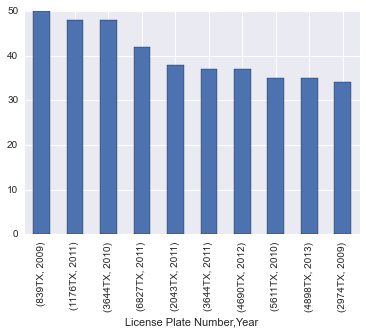

In [38]:
rb_taxi_tickets_plate_year = rb_taxi_tickets.groupby(['License Plate Number', 'Year'])['Ticket Number'].count()
top_tickets_plate_year = rb_taxi_tickets_plate_year.sort_values(ascending=False)
top_tickets_plate_year = top_tickets_plate_year[:10]

mean_tickets_plate_year = rb_taxi_tickets_plate_year.mean()
print('Mean yearly tickets per plate number from 2009 to March 10, 2016: {}'.format(mean_tickets_plate_year))
top_tickets_plate_year.plot(kind='bar')

### Tickets by Plate, Year
#### Notes
* Taxi drivers had a mean of 2.3 tickets for residential or business street parking a year
* Mean yearly cost for drivers (by plate) from these two ticket types was \$72.53

Mean yearly cost for these tickets per plate number from 2009 to March 10, 2016: 72.5283178737


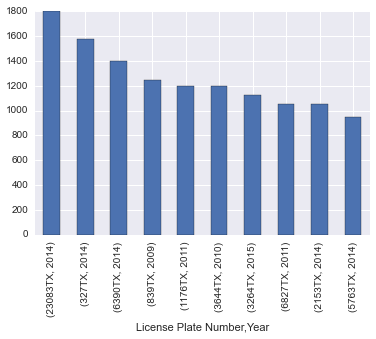

In [39]:
rb_plate_year_cost = rb_taxi_tickets.groupby(['License Plate Number', 'Year'])['Ticket Cost'].sum()
top_plate_year_cost = rb_plate_year_cost.sort_values(ascending=False)
top_plate_year_cost = top_plate_year_cost[:10]

mean_cost_plate_year = rb_plate_year_cost.mean()
print('Mean yearly cost for these tickets per plate number from 2009 to March 10, 2016: {}'.format(mean_cost_plate_year))
top_plate_year_cost.plot(kind='bar')